In [120]:
import pandas as pd
df =pd.read_csv("shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [121]:
df.brand.unique()

array(['Nike', 'Adidas'], dtype=object)

In [122]:
import matplotlib.pyplot as plt

In [123]:
df.shape

(60, 3)

In [124]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [125]:
# max, std are too big, guessing it might be a outlier
df[df.sold_qty>19.75]  # to see values greater than 75th percentile

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0
10,9/6/2023,Nike,23.0
16,9/9/2023,Nike,25.0
20,9/11/2023,Nike,23.0
23,9/12/2023,Adidas,689.0
26,9/14/2023,Nike,22.0
30,9/16/2023,Nike,21.0


In [126]:
df.isna().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [127]:
df.brand.value_counts()

brand
Nike      30
Adidas    30
Name: count, dtype: int64

In [128]:
df.groupby("brand")["sold_qty"].sum()

brand
Adidas    1044.0
Nike       550.0
Name: sold_qty, dtype: float64

In [129]:
# Nike Analysis
df_nike = df[df["brand"]=="Nike"]
df_nike.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [130]:
df_nike.shape

(30, 3)

In [131]:
df_nike.describe()   # no outliers

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [132]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [133]:
df_nike.isna().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [134]:
df_nike[df_nike["sold_qty"].isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [135]:
df_nike["sold_qty"].fillna(df_nike["sold_qty"].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8692\92785138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike["sold_qty"].fillna(df_nike["sold_qty"].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8692\92785138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike["sold_qty"].fillna(df_nike["sold_qty"].mean(),inpla

In [136]:
df_nike.isna().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [137]:
df_nike.loc[32]

date        9/17/2023
brand            Nike
sold_qty    19.642857
Name: 32, dtype: object

In [138]:
df_nike.loc[48]

date        9/25/2023
brand            Nike
sold_qty    19.642857
Name: 48, dtype: object

In [139]:
df_nike.describe() 

,sold_qty
count,30.000000
mean,19.642857
std,3.008199
min,14.000000
25%,17.250000
50%,19.642857
75%,22.000000
max,25.000000


In [140]:
df_nike["sold_qty"].sum()

589.2857142857142

In [141]:
# Nike Analysis
df_adi = df[df["brand"]=="Adidas"]
df_adi.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [142]:
df_adi.describe()   # identified outliers

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [143]:
# in nike analysis, there are no outliers , hence replaced null value with mean
# but if there are outliers, its better we replace null values with median

In [144]:
df_adi["sold_qty"].sum()

1044.0

In [145]:
# to find the value at 95th percentile
df_adi["sold_qty"].quantile([0.95])

0.95    18.55
Name: sold_qty, dtype: float64

In [146]:
df_adi[df_adi["sold_qty"]>18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


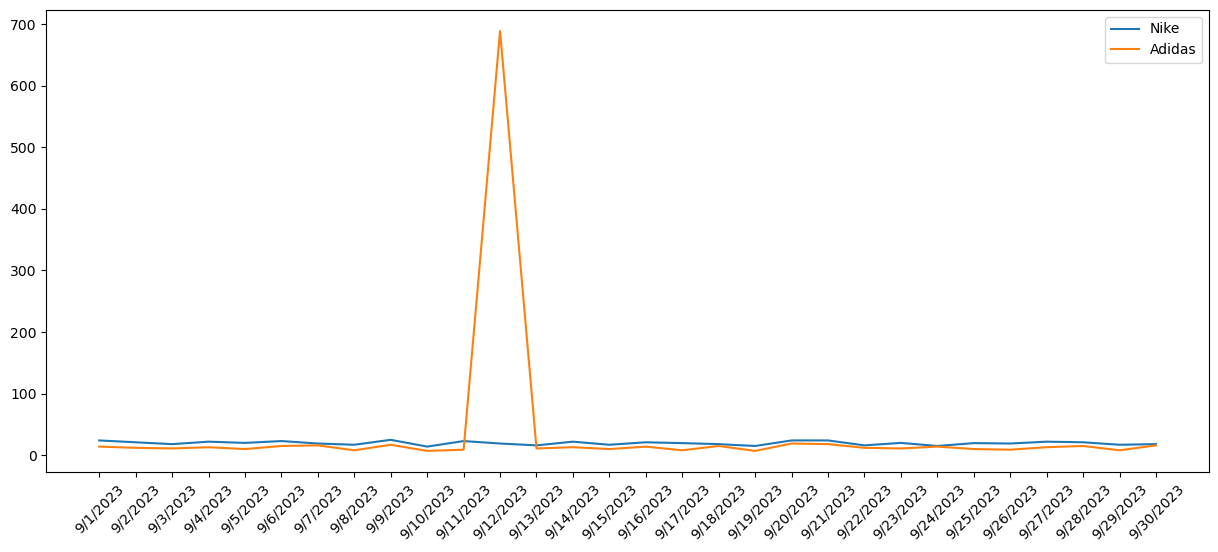

In [147]:
plt.figure(figsize=(15,6))
plt.plot(df_nike["date"],df_nike["sold_qty"],label="Nike")
plt.plot(df_adi["date"],df_adi["sold_qty"],label="Adidas")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [148]:
# not deleting outlier since data is low, replacing it with median

median_val = round(df_adi["sold_qty"].median())
median_val

12

In [149]:
# 23 is the row , where I have outlier
df_adi["sold_qty"].replace(689, inplace=True)
#df_adi.loc[23]= median_val

C:\Users\DELL\AppData\Local\Temp\ipykernel_8692\333836638.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_adi["sold_qty"].replace(689, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8692\333836638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adi["sold_qty"].replace(689, inplace=True)


In [150]:
df_adi.describe()

,sold_qty
count,30.000000
mean,12.133333
std,3.339764
min,7.000000
25%,9.250000
50%,12.000000
75%,14.750000
max,19.000000


In [151]:
df_adi.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


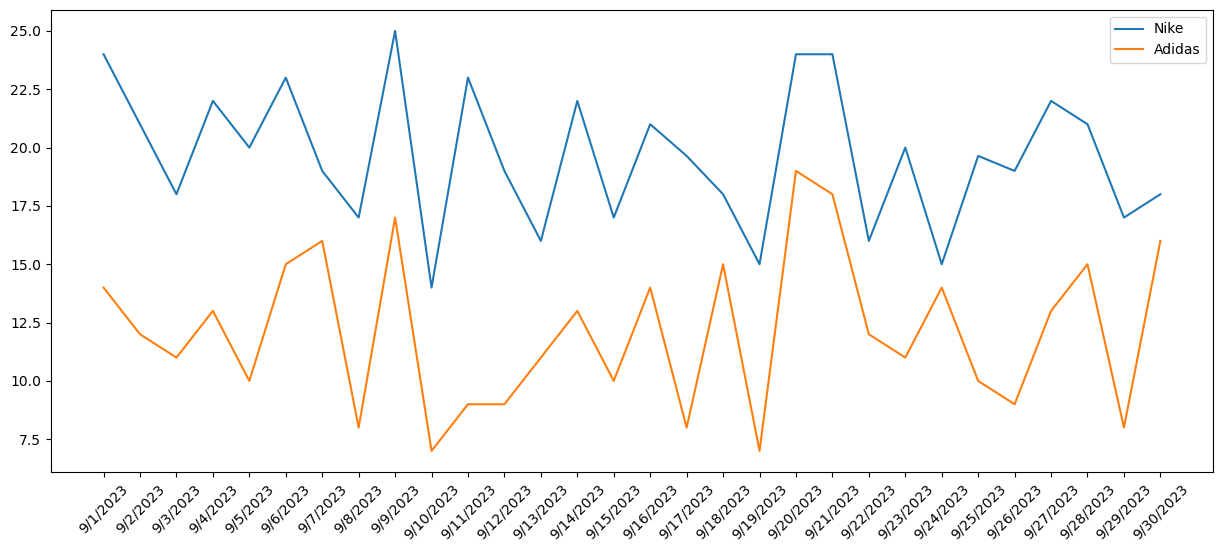

In [152]:
plt.figure(figsize=(15,6))
plt.plot(df_nike["date"],df_nike["sold_qty"],label="Nike")
plt.plot(df_adi["date"],df_adi["sold_qty"],label="Adidas")
plt.xticks(rotation=45)
plt.legend()
plt.show()